# Case Study on ANOVA

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
## Load Zone wise sales data from Sales_data_zone_wise.csv file
salesdata=pd.read_csv("D:\python\DSACaseStudy\Sales_data_zone_wise.csv")
## Diaplay first 5 rows from the data frame
salesdata.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [3]:
## Display the shape - total number of rows and columns in the sales data set
salesdata.shape

(29, 5)

In [4]:
## Display the columns header and data type specifications etc-This will give the information about the sales  data set. ie. column name, its counts and data type respectively
salesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [5]:
## Check null values if any
salesdata.isnull().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

No Null values present in the sales data set

<AxesSubplot:xlabel='Month'>

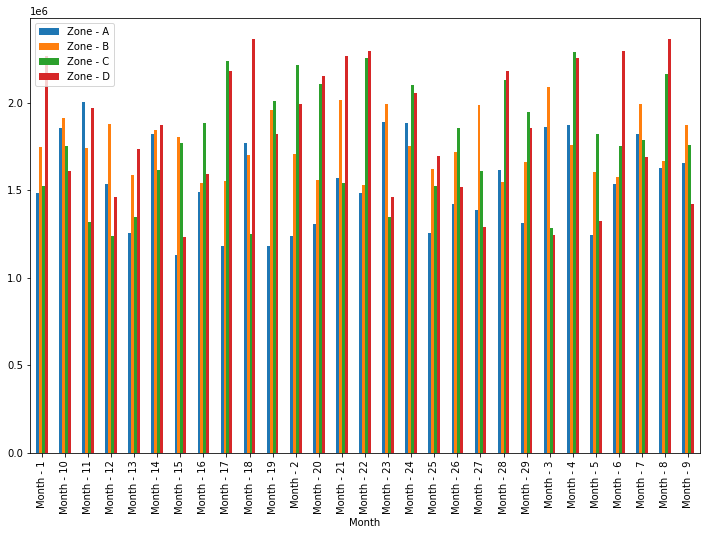

In [22]:
## Visualization of the sales dataset
salesdata.groupby('Month')[['Zone - A','Zone - B','Zone - C','Zone - D']].sum().plot(kind='bar',figsize=(12,8))

In [12]:
## Calculating the statistical data of the numerical values of the sales data set.
salesdata.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


In [11]:
 salesdata.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))
## This function will return the output after suppressing scientific notation

,Zone - A,Zone - B,Zone - C,Zone - D
count,29.000000,29.000000,29.000000,29.000000
mean,1540493.137931,1755559.586207,1772871.034483,1842926.758621
std,261940.061865,168389.885896,333193.724529,375016.479487
min,1128185.000000,1527574.000000,1237722.000000,1234311.000000
25%,1305972.000000,1606010.000000,1523308.000000,1520406.000000
50%,1534390.000000,1740365.000000,1767047.000000,1854412.000000
75%,1820196.000000,1875658.000000,2098463.000000,2180416.000000
max,2004480.000000,2091194.000000,2290580.000000,2364132.000000


## XYZ Company has offices in four different zones. Check whether the mean sales generated by each zone are same not


 We can use ANOVA test to compare the means of more than two groups. Here there are four zones, which are groups for ANOVA analysis. Here only factor or independent variable to evaluate , and therefore, one-way ANOVA method is suitable for analysis. So we have to test whether the mean sales from these zones are same or not.

H0: The mean sales generated from each zone are same.
    
H1:  The mean sales generated from each zone are not same.

In [20]:
import scipy.stats as stats

In [5]:
## Perform one-way ANOVA.
## The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups. 
statistic,pvalue=stats.f_oneway(salesdata["Zone - A"],salesdata["Zone - B"],salesdata["Zone - C"],salesdata["Zone - D"])
## This function returns
## statistic-The computed F statistic of the test.
## pvalue -The associated p-value from the F distribution.
print('Statistic :',statistic)
print('p value :',pvalue)

Statistic : 5.672056106843581
p value : 0.0011827601694503335


INTERPRETAION: The p value obtained from ANOVA analysis is significant(p<0.05), and therefore, we conclude that there are significant differences in the sales among zones.

## Check the total sales generated by all the zones for each month.


In [11]:
salesdata["TotalSales"]=salesdata.sum(axis=1)

In [6]:
salesdata

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total Sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


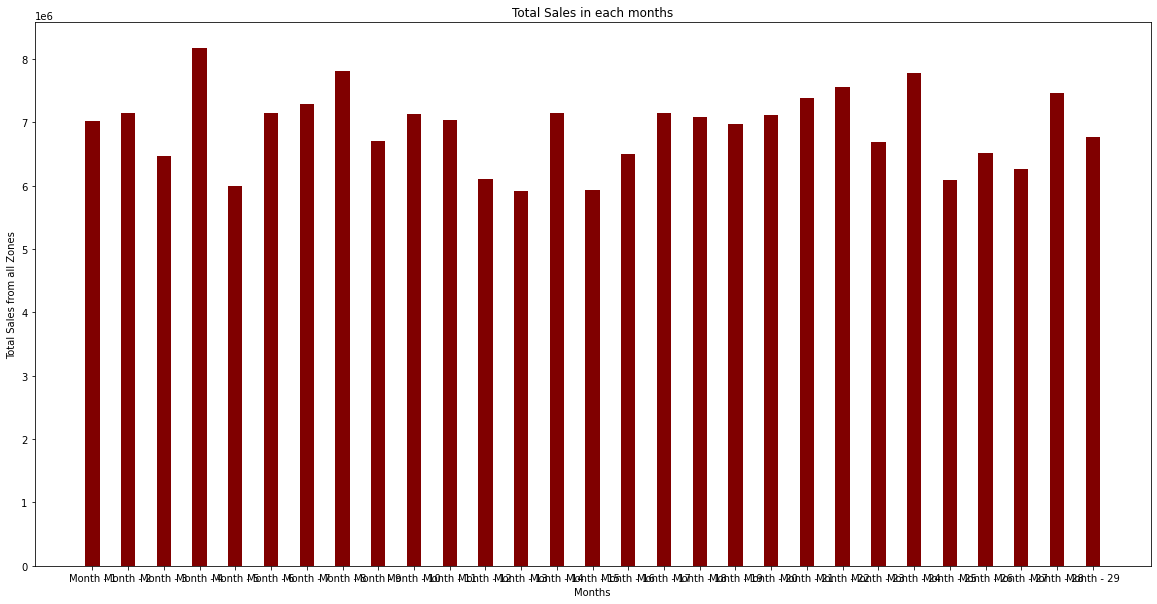

In [13]:
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(salesdata['Month'],salesdata['Total Sales'], color ='maroon',
        width = 0.4)
 
plt.xlabel("Months")
plt.ylabel("Total Sales from all Zones")
plt.title("Total Sales in each months")
plt.show()

The bar graph shows the difference in total sales generated by all the zones for each month

##  Check whether all the zones generate the same amount of sales

H0: All the zones generate the same amount of sales
    
H1: All the zones generate different amount of sales

In [28]:
fvalue,pvalue=stats.f_oneway(salesdata["Zone - A"],salesdata["Zone - B"],salesdata["Zone - C"],salesdata["Zone - D"])
## This function returns
## fvalue-The computed F statistic of the test.
## pvalue -The associated p-value from the F distribution.
print('f value :',fvalue)
print('p value :',pvalue)

f value : 5.672056106843581
p value : 0.0011827601694503335


The p value obtained from ANOVA analysis is significant(p<0.05), and therefore, we conclude that there are significant differences in the sales among zones.